In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# ==========================
# 1. Chargement du dataset
# ==========================

In [4]:
# Charger le dataset
dataset = pd.read_csv("Advertising.csv")

# Sélection des features et de la cible
X = dataset[['TV', 'Radio', 'Newspaper']].values  # Matrice des variables explicatives
y = dataset['Sales'].values.reshape(-1, 1)  # Variable cible

In [5]:
# Ajouter une colonne de biais à X
X = np.hstack((X, np.ones((X.shape[0], 1))))
X

array([[230.1,  37.8,  69.2,   1. ],
       [ 44.5,  39.3,  45.1,   1. ],
       [ 17.2,  45.9,  69.3,   1. ],
       [151.5,  41.3,  58.5,   1. ],
       [180.8,  10.8,  58.4,   1. ],
       [  8.7,  48.9,  75. ,   1. ],
       [ 57.5,  32.8,  23.5,   1. ],
       [120.2,  19.6,  11.6,   1. ],
       [  8.6,   2.1,   1. ,   1. ],
       [199.8,   2.6,  21.2,   1. ],
       [ 66.1,   5.8,  24.2,   1. ],
       [214.7,  24. ,   4. ,   1. ],
       [ 23.8,  35.1,  65.9,   1. ],
       [ 97.5,   7.6,   7.2,   1. ],
       [204.1,  32.9,  46. ,   1. ],
       [195.4,  47.7,  52.9,   1. ],
       [ 67.8,  36.6, 114. ,   1. ],
       [281.4,  39.6,  55.8,   1. ],
       [ 69.2,  20.5,  18.3,   1. ],
       [147.3,  23.9,  19.1,   1. ],
       [218.4,  27.7,  53.4,   1. ],
       [237.4,   5.1,  23.5,   1. ],
       [ 13.2,  15.9,  49.6,   1. ],
       [228.3,  16.9,  26.2,   1. ],
       [ 62.3,  12.6,  18.3,   1. ],
       [262.9,   3.5,  19.5,   1. ],
       [142.9,  29.3,  12.6,   1. ],
 

In [6]:
# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# =============================================
# 2. Régression multiple avec descente de gradient
# =============================================

In [8]:

# Initialiser le vecteur theta aléatoirement
theta = np.random.randn(X.shape[1], 1)
theta

array([[-2.28752961],
       [ 1.10064089],
       [ 0.72903561],
       [ 1.54346237]])

In [9]:
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [10]:
cost_function(X, y, theta)

np.float64(65220.47841848965)

In [11]:
# Paramètres de la descente de gradient
n_iterations = 800
learning_rate = 0.00001

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)


In [12]:
# Prédictions et évaluation pour la méthode manuelle
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v

predictions_manual = model(X_test, theta_final)
r2_manual = coef_determination(y_test, predictions_manual)
print(f'R² Score (Descente de gradient): {r2_manual}')

R² Score (Descente de gradient): 0.7945312245661038


In [13]:
theta_final

array([[ 0.04522795],
       [ 0.30790725],
       [-0.04474321],
       [ 1.5382674 ]])

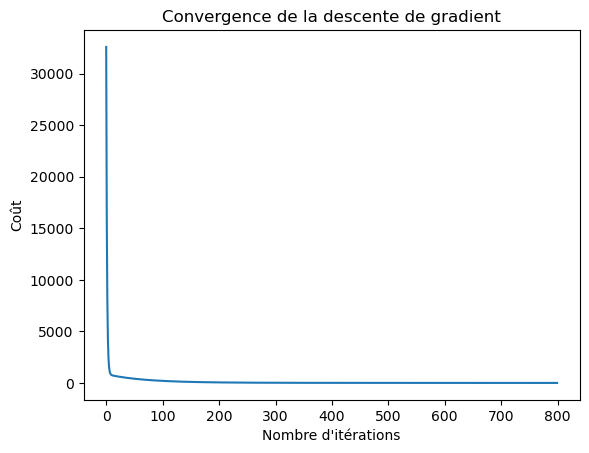

In [14]:
# Visualisation de la convergence de la fonction coût
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient")
plt.show()


In [15]:
# =====================================
# 3. Régression multiple avec Scikit-learn
# =====================================

In [16]:
# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train[:, :-1], y_train)  # Enlever la colonne de biais pour scikit-learn

LinearRegression()

In [17]:
# Prédictions
y_pred = model.predict(X_test[:, :-1])

In [18]:
# Évaluation du modèle
r2_sklearn = r2_score(y_test, y_pred)
print(f'R² Score (Scikit-learn): {r2_sklearn}')

R² Score (Scikit-learn): 0.899438024100912


In [19]:
# =============================
# 4. Comparaison des modèles
# =============================

In [20]:
# Comparaison des modèles
if r2_manual > r2_sklearn:
    print('Le modèle manuel avec descente de gradient donne de meilleurs résultats.')
else:
    print('Le modèle de scikit-learn est plus performant.')

Le modèle de scikit-learn est plus performant.


In [21]:
# ===============================
# 5. Visualisation des résultats
# ===============================

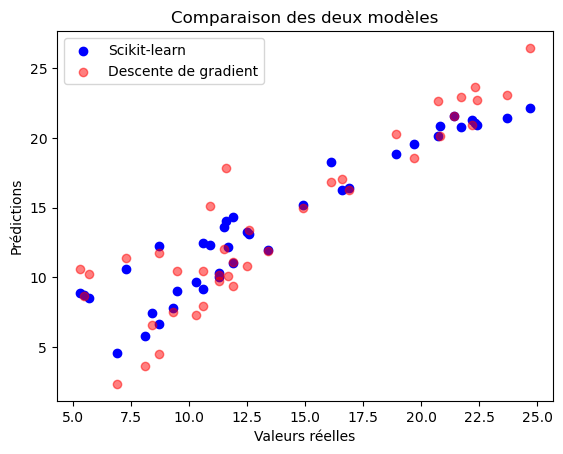

In [22]:
# Visualisation des prédictions vs valeurs réelles
plt.scatter(y_test, y_pred, color='blue', label='Scikit-learn')
plt.scatter(y_test, predictions_manual, color='red', label='Descente de gradient', alpha=0.5)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison des deux modèles")
plt.legend()
plt.show()